In [32]:
import ugradio
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline

def scaleToReal(analog_values, volt_range=[-1, 1]):
    type_info = np.iinfo(np.int16)

    x1 = volt_range[0]
    x2 = volt_range[1]

    a1 = type_info.min
    a2 = type_info.max

    real_values = []
    real2_values = []
    for i in analog_values:
        real_values.append(float(x2 - x1) * float(i - a1) / float(a2 - a1) + x1)
    return np.asarray(real_values)

def plotPower(filename, xlabel="Frequency (MHz)", ylabel="Power (V$\cdot$s)", N=1, max_volt=.1):
    v_samp = 62.5/N
    arr = np.load(filename)
    print arr
    #arr = scaleToReal(arr, [-.1, .1])
    dual_imag = arr[len(arr)/2:]
    dual_real = arr[:len(arr)/2]
    complex_arr = dual_real + np.multiply(1j, dual_imag)
    FT = np.fft.fft(complex_arr)
    freqs = np.fft.fftfreq(len(FT), 1/v_samp)
    power = np.abs(FT)**2
    #freqs, FT = ugradio.dft.dft(complex_arr[:4096], vsamp=4)
    #power = np.abs(FT)**2
    pl.plot(freqs, power)
    pl.xlabel(xlabel, fontsize=14)
    pl.ylabel(ylabel, fontsize=14)
    pl.xlim(-2, 2)

(array([  3.00000000e+00,   2.60000000e+01,   6.30000000e+01,
          4.83000000e+02,   6.91000000e+02,   6.40800000e+03,
          1.99770000e+04,   1.89580000e+04,   7.68730000e+04,
          4.65810000e+04,   1.11966000e+05,   1.45907000e+05,
          6.41570000e+04,   1.25657000e+05,   6.08500000e+04,
          1.36137000e+05,   1.17379000e+05,   8.13000000e+04,
          1.27121000e+05,   6.48560000e+04,   1.45385000e+05,
          1.06970000e+05,   4.31570000e+04,   6.57100000e+04,
          1.45590000e+04,   1.40240000e+04,   4.07100000e+03,
          4.23000000e+02,   2.60000000e+02,   2.70000000e+01,
          1.80000000e+01,   3.00000000e+00]),
 array([-6144., -5736., -5328., -4920., -4512., -4104., -3696., -3288.,
        -2880., -2472., -2064., -1656., -1248.,  -840.,  -432.,   -24.,
          384.,   792.,  1200.,  1608.,  2016.,  2424.,  2832.,  3240.,
         3648.,  4056.,  4464.,  4872.,  5280.,  5688.,  6096.,  6504.,
         6912.]),
 <a list of 32 Patch objects

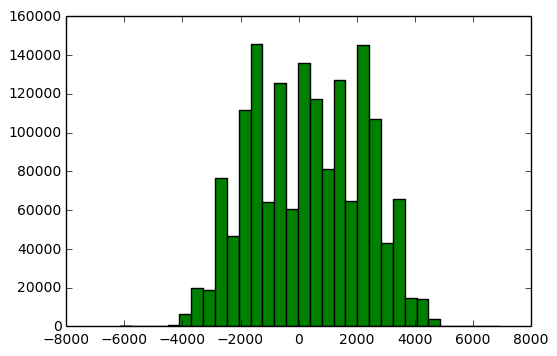

In [45]:
filename = "noisy_data_1_50mV.npy"
filename2 = "50_block_50mV.npy"
arr = np.load(filename2)
pl.hist(arr, bins = 32, color = "green", normed=False)


[ 256  256    0 ..., -512  256    0]


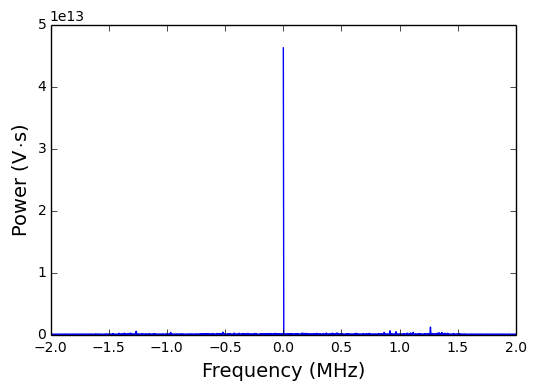

In [33]:
file1 = "noisy_data_1_50mV.npy"
plotPower(file1)


In [39]:
ugradio.timing.lst()

1.6406020865734643